# Ph√¢n t√≠ch d·ªØ li·ªáu Titanic

Link data set: [Titanic Data Set from Kaggle](https://www.kaggle.com/competitions/titanic/data?select=train.csv).

## 1.Import th∆∞ vi·ªán

In [86]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore") # B·ªè qua l·ªói

pd.set_option('float_format', '{:2f}'.format) # Hi·ªÉn th·ªã ƒë·∫ßy ƒë·ªß s·ªë thay v√¨ 1e5


## 2.Import d·ªØ li·ªáu t·ª´ file csv


In [3]:
df = pd.read_csv('Data\\titanic_train.csv')

In [4]:
#Ki·ªÉm tra d·ªØ li·ªáu
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    male 22.000000      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000000      1   
2                             Heikkinen, Miss. Laina  female 26.000000      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.000000      1   
4                           Allen, Mr. William Henry    male 35.000000      0   

   Parch            Ticket      Fare Cabin Embarked  
0      0         A/5 21171  7.250000   NaN        S  
1      0          PC 17599 71.283300   C85        C  
2      0  STON/O2. 3101282  7.925000   NaN        S  
3      0            113803 53.100000  C123        S  
4      0            373450  8.050000   NaN        S

## 3.Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu



### 3.1.Ki·ªÉm tra d·ªØ li·ªáu:

In [5]:
# Ki·ªÉm tra d·ªØ li·ªáu null
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

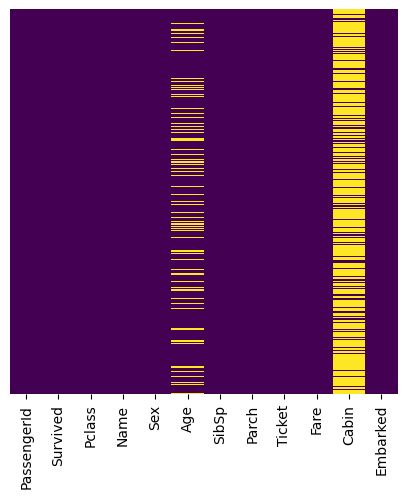

In [6]:
# Plot heatmap ƒë·ªÉ xem c√°c tr∆∞·ªùng null
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

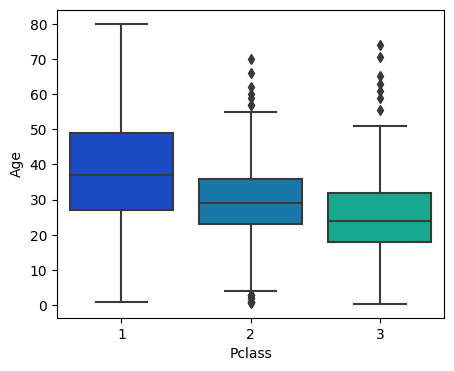

In [7]:
# Plot boxplot ƒë·ªÉ xem outliers
plt.figure(figsize=(5, 4))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')
plt.show()

### 3.2.X·ª≠ l√Ω d·ªØ li·ªáu ƒë·ªÉ ph√¢n t√≠ch

In [8]:
# L·∫•y tu·ªïi trung v·ªã c·ªßa m·ªói Pclass
median1 = df[df['Pclass'] == 1]['Age'].median()
median2 = df[df['Pclass'] == 2]['Age'].median()
median3 = df[df['Pclass'] == 3]['Age'].median()

median1, median2, median3


(37.0, 29.0, 24.0)

In [9]:
# Fill c√°c d·ªØ li·ªáu tu·ªïi b·ªã null
df.loc[(df['Pclass'] == 1) & (df['Age'].isna()), 'Age'] = median1
df.loc[(df['Pclass'] == 2) & (df['Age'].isna()), 'Age'] = median2
df.loc[(df['Pclass'] == 3) & (df['Age'].isna()), 'Age'] = median3


In [10]:
#Ki·ªÉm tra null
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#X√≥a c·ªôt Cabin v√¨ c√≥ qu√° nhi·ªÅu d·ªØ li·ªáu b·ªã null s·∫Ω ·∫£nh h∆∞·ªõng ƒë·∫øn qu√° tr√¨nh ph√¢n t√≠ch
df.drop(columns='Cabin', inplace=True)

In [12]:
#X√≥a 2 d√≤ng c√≥ d·ªØ li·ªáu Embarked b·ªã null
df.dropna(inplace=True)
df.reset_index(drop=True, inplace = True)


In [13]:
# Ki·ªÉm tra null
df.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
#Ki·ªÉm tra ki·ªÉu d·ªØ li·ªáu c·ªßa c√°c attributes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [15]:
#Chuy·ªÉn c·ªôt age th√†nh ki·ªÉu d·ªØ li·ªáu int
df['Age'] =  df['Age'].astype('int')

In [16]:
#Xem l·∫°i d·ªØ li·ªáu
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket      Fare Embarked  
0      0         A/5 21171  7.250000        S  
1      0          PC 17599 71.283300        C  
2      0  STON/O2. 3101282  7.925000        S  
3      0            113803 53.100000        S  
4      0            373450  8.050000        S

In [17]:
l = []
for s in df['Age']:
    if s < 18:
        l.append('< 18')
    elif s <= 60:
        l.append('18-60')
    else:
        l.append('> 60')

df['age_range'] = l
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
884          887         0       2   
885          888         1       1   
886          889         0       3   
887          890         1       1   
888          891         0       3   

                                                  Name     Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    male   22      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                               Heikkinen, Miss. Laina  female   26      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                             Allen, Mr. William Henry    male   35      0   
..                                                 ...     ...  ...    ...   
884                              Montvila, Rev. Juozas    male   27      0   
885                       Graham, Miss. Margaret Edith  female   19      0   
886           Johnston, Miss. Catherine Helen "Carrie"  female   24      1   
887                              Behr, Mr. Karl Howell    male   26      0   
888                                Dooley, Mr. Patrick    male   32      0   

     Parch            Ticket      Fare Embarked age_range  
0        0         A/5 21171  7.250000        S     18-60  
1        0          PC 17599 71.283300        C     18-60  
2        0  STON/O2. 3101282  7.925000        S     18-60  
3        0            113803 53.100000        S     18-60  
4        0            373450  8.050000        S     18-60  
..     ...               ...       ...      ...       ...  
884      0            211536 13.000000        S     18-60  
885      0            112053 30.000000        S     18-60  
886      2        W./C. 6607 23.450000        S     18-60  
887      0            111369 30.000000        C     18-60  
888      0            370376  7.750000        Q     18-60  

[889 rows x 12 columns]

## 4.Ph√¢n t√≠ch v√† tr·ª±c quan h√≥a d·ªØ li·ªáu

### 4.1.S·ªë ti·ªÅn m√† c√°c h√†nh kh√°ch ph·∫£i b·ªè ra ƒë·ªÉ l√™n t√†u Titanic

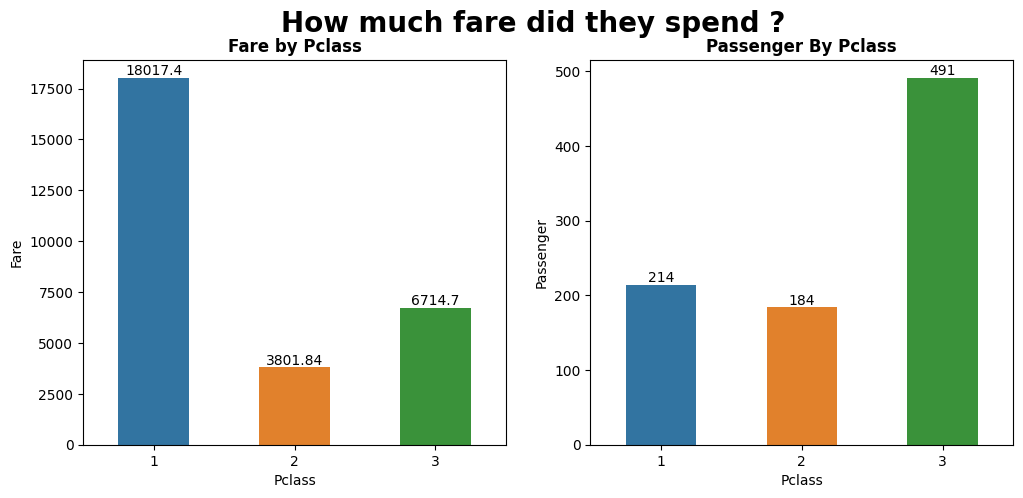

In [18]:
#1 bar 1 pie
plt.figure(figsize=(12,5))
data1 = df.groupby(['Pclass'])['Fare'].sum().reset_index()
plt.subplot(1,2,1)
ax = sns.barplot(
    data = data1,
    x = 'Pclass',
    y = 'Fare',
    width=0.5
)
for cont in ax.containers:
    plt.bar_label(cont)
plt.title('Fare by Pclass', fontweight = 'bold')

plt.subplot(1,2,2)
ax = sns.barplot(
    data = df.groupby(['Pclass'])['PassengerId'].count().reset_index(),
    x = 'Pclass',
    y = 'PassengerId',
    width= 0.5
)
for cont in ax.containers:
    plt.bar_label(cont)
plt.title('Passenger By Pclass', fontweight = 'bold')
plt.ylabel('Passenger')
plt.suptitle('How much fare did they spend ?', fontsize = 20, fontweight = 'bold')
plt.show()


+ Nh·∫≠n x√©t:
    + C√≥ 3 h·∫°ng gh·∫ø tr√™n con t√†u Titanic, bao g·ªìm: 1 - H·∫°ng th∆∞∆°ng gia, 2 - H·∫°ng trung l∆∞u, 3 - H·∫°ng ph·ªï th√¥ng.
    + C√≥ t·ªïng c·ªông 889 h√†nh kh√°ch tr√™n con t√†u Titanic.
    + S·ªë l∆∞·ª£ng ng∆∞·ªùi ƒëi Pclass 3 chi·∫øm t·ªâ l·ªá l·ªõn nh·∫•t (491 - 55.23%)
    + Tuy nhi√™n s·ªë ti·ªÅn b·ªè ra c·ªßa ng∆∞·ªùi ƒëi Pclass 1 v∆∞·ª£t tr·ªôi ho√†n to√†n so v·ªõi 2 Pclass c√≤n l·∫°i (18017.4$ - 63.1%).


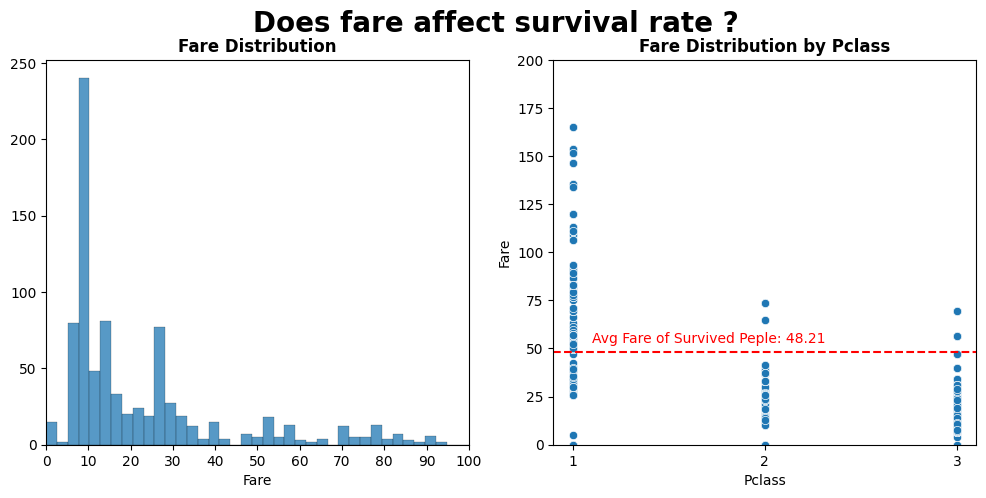

In [19]:
plt.figure(figsize=(12,5))
avg_suvived = df['Fare'][df['Survived']==1].mean()
plt.subplot(1,2,1)
sns.histplot(
    data=df,
    x = 'Fare',
    bins = 200
)
plt.xlim(0,100)
plt.xticks(range(0,101,10))
plt.ylabel("")
plt.title('Fare Distribution', fontweight = 'bold')

plt.subplot(1,2,2)
sns.scatterplot(
    data = df,
    x = 'Pclass',
    y = 'Fare',

)
plt.ylim(0,200)
plt.xticks(range(1,4,1))
plt.axhline(y = avg_suvived, ls = "--", color = 'red')
plt.text(x=1.1,y=avg_suvived+5, s = f'Avg Fare of Survived Peple: {round(avg_suvived,2)}',color = 'red')
plt.title('Fare Distribution by Pclass', fontweight = 'bold')

plt.suptitle('Does fare affect survival rate ?', fontsize = 20, fontweight = 'bold')
plt.show()

+ Nh·∫≠n x√©t: 
    + Tuy ch·ªâ c√≥ 3 Pclass nh∆∞ng l·∫°i c√≥ r·∫•t nhi·ªÅu gi√° v√© kh√°c nhau ƒë·ªÉ l√™n t√†u Titanic.
    + S·ªë ti·ªÅn m√† h√†nh kh√°ch ph·∫£i b·ªè ra ch·ªß y·∫øu n·∫±m ·ªü kho·∫£ng 5$ - 35$ v√† nhi·ªÅu nh·∫•t l√† kho·∫£ng 8$ - 10$.
    + V·∫´n c√≥ nh·ªØng h√†nh kh√°ch b·ªè ra s·ªë ti·ªÅn l·ªõn cho chuy·∫øn ƒëi (>50$).
    + S·ªë ti·ªÅn trung b√¨nh c·ªßa nh·ªØng h√†nh kh√°ch s·ªëng s√≥t tr√™n con t√†u l√† 48.21$.
    + Ch·ªâ c√≥ 4 ng∆∞·ªùi (2 ng∆∞·ªùi c·ªßa Pclass 2 v√† 2 ng∆∞·ªùi c·ªßa Pclass 3) b·ªè ra s·ªë ti·ªÅn l·ªõn h∆°n con s·ªë 48.21$, trong khi ƒë√≥ h·∫ßu h·∫øt l√† nh·ªØng h√†nh kh√°ch thu·ªôc v·ªÅ Pclass 1.
    + Ng∆∞·ª£c l·∫°i v√πng t·ª´ 0$ - 10$ g·∫ßn nh∆∞ ch·ªâ t·ªìn t·∫°i nh·ªØng h√†nh kh√°ch thu·ªôc Pclass 3.

#### K·∫øt lu·∫≠n
- Tuy ch·ªâ c√≥ 3 h·∫°ng v√© ph·ªï bi·∫øn nh∆∞ng l·∫°i c√≥ r·∫•t nhi·ªÅu m·ª©c gi√° kh√°c nhau ƒë·ªÉ l√™n t√†u Titanic.
- C√≥ nh·ªØng ng∆∞·ªùi mua v√© h·∫°ng ph·ªï th√¥ng nh∆∞ng ph·∫£i tr·∫£ m·ª©c gi√° b·∫±ng ho·∫∑c cao h∆°n h·∫°ng th∆∞∆°ng gia. C√≥ th·ªÉ nh·ªØng y·∫øu t·ªë kh√°ch quan nh∆∞ th·ªùi ƒëi·ªÉm mua v√©, ƒë·ªãa ƒëi·ªÉm mua v√©, ng∆∞·ªùi b√°n v√©,... ƒë√£ g√¢y ra s·ª± kh√¥ng nh·∫•t qu√°n v·ªÅ gi√° v√©.
- Tuy nhi√™n, v√¨ ch·ªâ c√≥ m·ªôt s·ªë √≠t tr∆∞·ªùng h·ª£p ngo·∫°i l·ªá, n√™n gi√° v√© trung b√¨nh v·∫´n ph√¢n b·ªë ƒë√∫ng theo h·∫°ng gh·∫ø tr√™n t√†u.

### 4.2.ƒê·ªô tu·ªïi trung b√¨nh c·ªßa c√°c h√†nh kh√°ch trong s·ª± ki·ªán Titanic

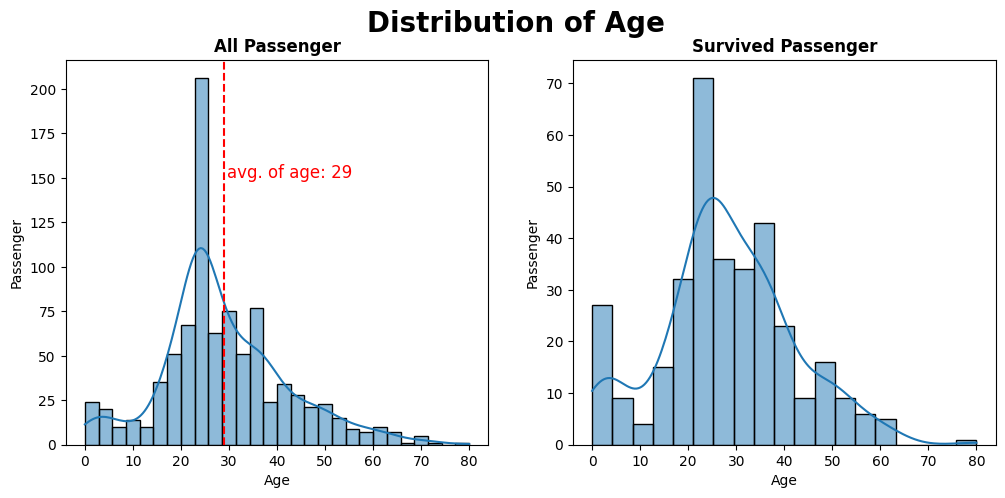

In [20]:
plt.figure(figsize=(12,5))
mean_age = df['Age'].mean()
plt.subplot(1,2,1)
sns.histplot(
    x = df['Age'],
    kde=True
)
plt.title('All Passenger', fontweight = 'bold')
plt.axvline(x=mean_age, ls='--', color = 'red')
plt.ylabel("Passenger")
plt.text(x = mean_age + 0.5,y = 150, s = f'avg. of age: {int(mean_age)}', fontsize = 12, color = 'red')

plt.subplot(1,2,2)
sns.histplot(
    x = df[df['Survived']==1]['Age'],
    kde=True
)
plt.title('Survived Passenger', fontweight = 'bold')
plt.ylabel("Passenger")

plt.suptitle('Distribution of Age', fontsize = 20, fontweight = 'bold')
plt.show()

+ Nh·∫≠n x√©t:
    + C√≥ h·∫ßu h·∫øt t·∫•t c·∫£ c√°c l·ª©a tu·ªïi ƒëi t√†u Titanic.
    + ƒê·ªô tu·ªïi ph·ªï bi·∫øn c·ªßa c√°c h√†nh kh√°ch l√† kho·∫£ng 18 - 40 tu·ªïi, trong ƒë√≥ ƒë√¥ng nh·∫•t l√† ƒë·ªô tu·ªïi 24 - 26 tu·ªïi.
    + ƒê·ªô tu·ªïi trung b√¨nh c·ªßa c√°c h√†nh kh√°ch l√† 29 tu·ªïi.
    + ƒê·ªëi v·ªõi nh·ªØng h√†nh kh√°ch c√≤n s·ªëng, ph√¢n b·ªë v·ªÅ ƒë·ªô tu·ªïi g·∫ßn nh∆∞ t∆∞∆°ng t·ª± nh∆∞ ph√¢n b·ªë c·ªßa to√†n b·ªô kh√°ch tr√™n t√†u, ch·ªâ c√≥ m·ªôt ch√∫t kh√°c bi·ªát ƒë√°ng l∆∞u √Ω ·ªü ƒë·ªô tu·ªïi t·ª´ 0 - 5 tu·ªïi.

#### K·∫øt lu·∫≠n
=> Tu·ªïi t√°c kh√¥ng ·∫£nh h∆∞·ªüng ƒë·∫øn kh·∫£ nƒÉng s·ªëng x√≥t c·ªßa c√°c h√†nh kh√°ch tr√™n t√†u Titanic tr·ª´ c√°c em nh·ªè d∆∞·ªõi 5 tu·ªïi h·∫ßu h·∫øt ƒë·ªÅu ƒë∆∞·ª£c c·ª©u s·ªëng.

### 4.3.S·ª± ·∫£nh h∆∞·ªüng c·ªßa vi·ªác ƒëi c√πng ng∆∞·ªùi th√¢n l√™n t√†u Titanic

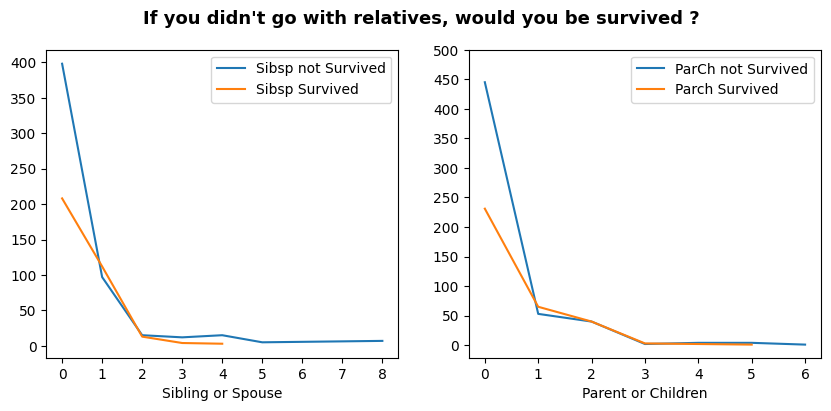

In [21]:
plt.figure(figsize=(10,4))
data2 = df[df['Survived']==0].groupby(['SibSp','Survived'])['PassengerId'].count().reset_index()
data3 = df[df['Survived']==0].groupby(['Parch','Survived'])['PassengerId'].count().reset_index()
data4 = df[df['Survived']==1].groupby(['SibSp','Survived'])['PassengerId'].count().reset_index()
data5 = df[df['Survived']==1].groupby(['Parch','Survived'])['PassengerId'].count().reset_index()

plt.subplot(1,2,1)
plt.plot(data2['SibSp'], data2['PassengerId'], label = 'Sibsp not Survived')
plt.plot(data4['SibSp'], data4['PassengerId'], label = 'Sibsp Survived')
plt.xlabel('Sibling or Spouse')
plt.xticks(range(0,9,1))
plt.legend()

plt.subplot(1,2,2)
plt.plot(data3['Parch'], data3['PassengerId'], label = 'ParCh not Survived')
plt.plot(data5['Parch'], data5['PassengerId'], label = 'Parch Survived')
plt.xlabel('Parent or Children')
plt.yticks(range(0,501,50))
plt.legend()

plt.suptitle("If you didn't go with relatives, would you be survived ?", fontweight = 'bold', fontsize = 13)
plt.show()

+ Nh·∫≠n x√©t:
    + So s√°nh 2 bi·ªÉu ƒë·ªì tr√™n, ta th·∫•y n√©t t∆∞∆°ng ƒë·ªìng gi·ªØa vi·ªác ƒëi v·ªõi anh ch·ªã em, v·ª£ ch·ªìng so v·ªõi vi·ªác ƒëi v·ªõi cha m·∫π ho·∫∑c con c√°i.
    + ƒê·ªëi v·ªõi nh·ªØng ng∆∞·ªùi ƒëi v·ªõi ng∆∞·ªùi th√¢n (t·ª´ 1 ng∆∞·ªùi tr·ªü l√™n), t·ªâ l·ªá s·ªëng v√† ch·∫øt g·∫ßn nh∆∞ l√† nh∆∞ nhau.
    + ƒê·ªëi v·ªõi nh·ªØng ng∆∞·ªùi ƒëi m·ªôt m√¨nh, s·ªë ng∆∞·ªùi s·ªëng s√≥t ch·ªâ b·∫±ng m·ªôt n·ªØa s·ªë ng∆∞·ªùi ch·∫øt.
    + Kh√¥ng c√≥ b·∫•t k√¨ ng∆∞·ªùi n√†o ƒëi v·ªõi 4 anh ch·ªã em tr·ªü l√™n c√≤n s·ªëng, trong khi ƒë√≥ n·∫øu ƒëi v·ªõi s·ªë l∆∞·ª£ng l·ªõn cha m·∫π ho·∫∑c con c√°i t·ªâ l·ªá s·ªëng s√≥t ho√†n to√†n cao h∆°n.

#### K·∫øt lu·∫≠n:
- V√¨ t·ªâ l·ªá h√†nh kh√°ch c√≤n s·ªëng th·∫•p h∆°n t·ªâ l·ªá h√†nh kh√°ch ƒë√£ ch·∫øt n√™n ta ho√†n to√†n c√≥ th·ªÉ n√≥i vi·ªác ƒëi v·ªõi ng∆∞·ªùi th√¢n c√≥ ·∫£nh h∆∞·ªüng ƒë·∫øn kh·∫£ nƒÉng s·ªëng s√≥t sau s·ª± ki·ªán Titanic.
- Nh·ªØng ng∆∞·ªùi ƒëi v·ªõi ng∆∞·ªùi th√¢n c√≥ kh·∫£ nƒÉng cao ƒë∆∞·ª£c nh∆∞·ªùng l√™n t√†u c·ª©u h·ªô v√† s·ªëng x√≥t (g·∫ßn nh∆∞ 100% t·ªâ l·ªá s·ªëng x√≥t n·∫øu l√† tr·∫ª em d∆∞·ªõi 5 tu·ªïi), c√≤n nh·ªØng ng∆∞·ªùi ƒëi m·ªôt m√¨nh ph·∫£i t·ª± t√¨m c√°ch ƒë·ªÉ s·ªëng s√≥t. (Bao g·ªìm c·∫£ y·∫øu t·ªë s·ªë l∆∞·ª£ng t√†u c·ª©u h·ªô l√† c·ªë ƒë·ªãnh)

### 4.4.S·ªë l∆∞·ª£ng ng∆∞·ªùi s·ªëng x√≥t sau s·ª± ki·ªán Titanic

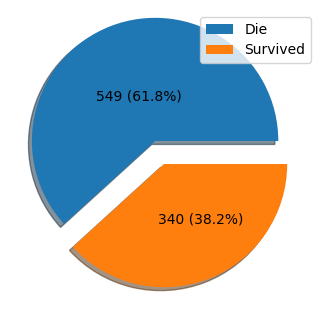

In [124]:
plt.figure(figsize=(4,4))
data6 = df.groupby(['Survived'])['PassengerId'].count().reset_index()
plt.pie(x = data6['PassengerId'], explode=[0.2,0], shadow=True)
plt.legend(labels = ['Die','Survived'])
total = data6['PassengerId'].sum()
for i, value in enumerate(data6['PassengerId']):
    percentage = value / total * 100
    plt.text(0.5*i-0.2, 0.55-i, f"{value} ({percentage:.1f}%)", ha='center', va='center')

plt.show()


+ Nh·∫≠n x√©t:
    + C√≥ t·ªïng c·ªông 889 h√†nh kh√°ch tr√™n chuy·∫øn t√†u Titanic.
    + Trong ƒë√≥ c√≥ 340 ng∆∞·ªùi s·ªëng s√≥t (38.2%) v√† 549 ng∆∞·ªùi thi·ªát m·∫°ng (61.8%)

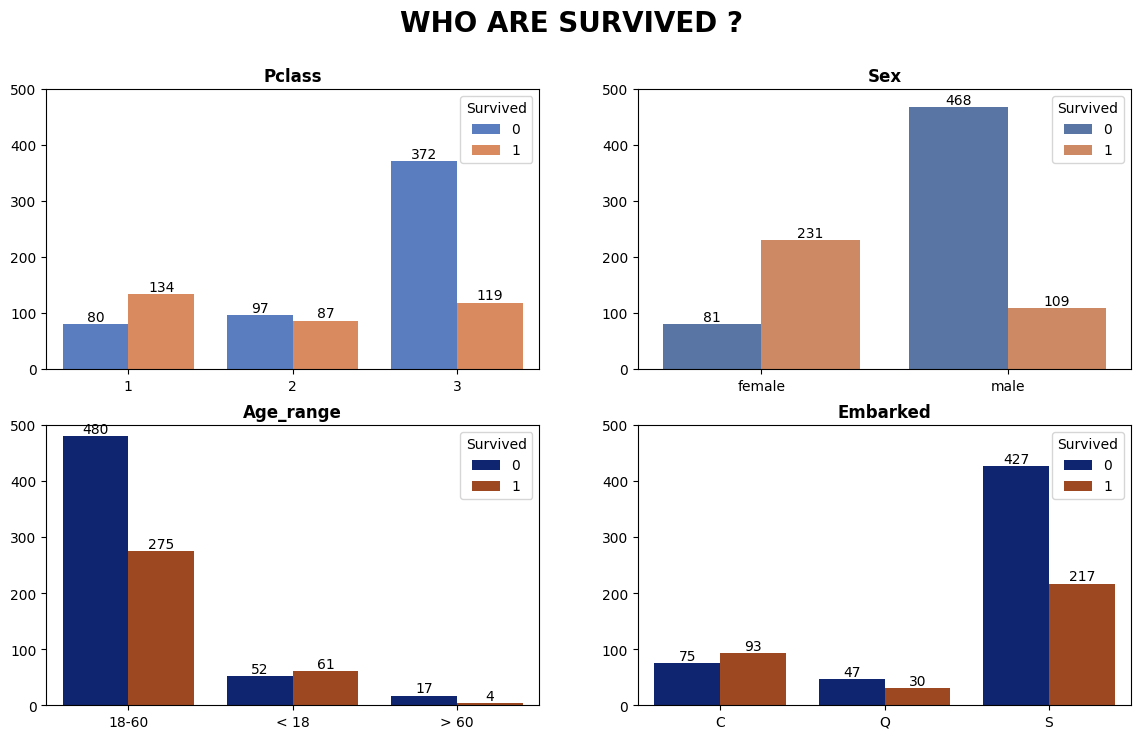

In [126]:
cate_cols = ['Pclass', 'Sex', 'age_range','Embarked']
available_palettes = ['deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind','Set1','Set2','Set3']
plt.figure(figsize = (14, 8))

for i, col_name in enumerate(cate_cols):
    plt.subplot(2,2,i+1)
    ax = sns.barplot(
    data = df.groupby([f'{col_name}','Survived'])['PassengerId'].count().reset_index(),
    x = f'{col_name}',
    y = 'PassengerId',
    hue = 'Survived',
    palette= random.choice(available_palettes)
)
# bar label:
    for cont in ax.containers:
        plt.bar_label(cont)
    plt.title(f'{col_name.capitalize()}', fontweight = 'bold')
    plt.ylabel('')
    plt.ylim(0,500)
    plt.xlabel('')
plt.suptitle("WHO ARE SURVIVED ?", fontsize = 20, fontweight = 'bold')
plt.show()

+ Nh·∫≠n x√©t:
    1. Theo h·∫°ng gh·∫ø
        * Ch·ªâ c√≥ h·∫°ng th∆∞∆°ng gia l√† c√≥ s·ªë ng∆∞·ªùi s·ªëng s√≥t nhi·ªÅu h∆°n s·ªë ng∆∞·ªùi thi·ªát m·∫°ng ƒë·ªìng th·ªùi l√† h·∫°ng gh·∫ø c√≥ s·ªë l∆∞·ª£ng ng∆∞·ªùi s·ªëng s√≥t l·ªõn nh·∫•t.
        * S·ªë l∆∞·ª£ng ng∆∞·ªùi thi·ªát m·∫°ng c·ªßa h·∫°ng ph·ªï th√¥ng nhi·ªÅu g·∫•p 3 l·∫ßn s·ªë ng∆∞·ªùi s·ªëng s√≥t ·ªü h·∫°ng n√†y v√† c≈©ng l√† h·∫°ng gh·∫ø c√≥ s·ªë l∆∞·ª£ng ng∆∞·ªùi thi·ªát m·∫°ng l·ªõn nh·∫•t.
    2. Theo gi·ªõi t√≠nh
        * S·ªë ng∆∞·ªùi s·ªëng s√≥t l√† n·ªØ nhi·ªÅu g·∫•p g·∫ßn 3 l·∫ßn s·ªë ng∆∞·ªùi thi·ªát m·∫°ng v√† nhi·ªÅu g·∫•p 2 l·∫ßn s·ªë ng∆∞·ªùi s·ªëng s√≥t l√† nam gi·ªõi.
        * Ng∆∞·ª£c l·∫°i, s·ªë l∆∞·ª£ng ng∆∞·ªùi t·ª≠ vong ·ªü nam nhi·ªÅu g·∫•p 4 l·∫ßn s·ªë ng∆∞·ªùi s·ªëng s√≥t v√† g·∫•p g·∫ßn 6 l·∫ßn s·ªë ng∆∞·ªùi t·ª≠ vong l√† n·ªØ.
    3. Theo ƒë·ªô tu·ªïi
        * Ch·ªâ c√≥ ƒë·ªô tu·ªïi d∆∞·ªõi 18 tu·ªïi l√† c√≥ s·ªë l∆∞·ª£ng ng∆∞·ªùi s·ªëng s√≥t cao h∆°n s·ªë l∆∞·ª£ng ng∆∞·ªùi t·ª≠ vong.
        * Nh∆∞ ƒë√£ ph√¢n t√≠ch ·ªü tr√™n, h·∫ßu h·∫øt tr·∫ª em ·ªü ƒë·ªô tu·ªïi 0 - 5 tu·ªïi ƒë·ªÅu s·∫Ω ƒë∆∞·ª£c s·ªëng s√≥t.
    4. Theo c·∫£ng kh·ªüi h√†nh
        * Tr√™n th·ª±c t·∫ø vi·ªác c√°c h√†nh kh√°ch xu·∫•t ph√°t ·ªü c·∫£ng n√†o kh√¥ng th·ª±c s·ª± ·∫£nh h∆∞·ªüng ƒë·∫øn vi·ªác h·ªç s·ªëng hay thi·ªát m·∫°ng.
        * Tuy nhi√™n, v√¨ s·ªë l∆∞·ª£ng ng∆∞·ªùi s·ªëng s√≥t √≠t h∆°n kh√° nhi·ªÅu so v·ªõi ng∆∞·ªùi thi·ªát m·∫°ng nh∆∞ng nh·ªØng ng∆∞·ªùi xu·∫•t ph√°t t·ª´ c·∫£ng C v·∫´n c√≥ t·ªâ l·ªá s·ªëng s√≥t cao h∆°n so v·ªõi t·ª≠ vong, ƒëi·ªÅu ƒë√≥ ch·ª©ng t·ªè nh·ªØng ng∆∞·ªùi xu·∫•t ph√°t t·ª´ c·∫£ng C r∆°i v√†o c√°c tr∆∞·ªùng h·ª£p sau: ph·∫ßn l·ªõn ƒëi h·∫°ng th∆∞∆°ng gia, h·∫ßu h·∫øt l√† ph·ª• n·ªØ, gia ƒë√¨nh c√≥ ƒë√¥ng con nh·ªè.


#### K·∫øt lu·∫≠n: Nh·ªØng h√†nh kh√°ch c√≥ kh·∫£ nƒÉng s·ªëng s√≥t cao nh·∫•t sau s·ª± ki·ªán Titanic l√† nh·ªØng ng∆∞·ªùi thu·ªôc nh√≥m sau: 
    => Ph·ª• n·ªØ
    => Tr·∫ª em
    => Ng∆∞·ªùi ƒëi h·∫°ng th∆∞∆°ng gia

## 5.·ª®ng d·ª•ng machine learning ƒë·ªÉ d·ª± ƒëo√°n t·ªâ l·ªá s·ªëng x√≥t sau s·ª± ki·ªán Titanic

### 5.1.X·ª≠ l√Ω d·ªØ li·ªáu ƒë·ªÉ training model

In [24]:
# Copy data frame ƒë·ªÉ kh√¥ng ·∫£nh h∆∞·ªüng ƒë·∫øn d·ªØ li·ªáu g·ªëc
df2 = df.copy()
df2.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket      Fare Embarked age_range  
0      0         A/5 21171  7.250000        S     18-60  
1      0          PC 17599 71.283300        C     18-60  
2      0  STON/O2. 3101282  7.925000        S     18-60  
3      0            113803 53.100000        S     18-60  
4      0            373450  8.050000        S     18-60

In [25]:
# Set gi·ªõi t√≠nh nam l√† 1 gi·ªõi t√≠nh n·ªØ l√† 0
df2.loc[df2['Sex'] == 'male', 'Sex'] = 1
df2.loc[df2['Sex'] == 'female', 'Sex'] = 0


In [26]:
# Ki·ªÉm tra d·ªØ li·ªáu
df2.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   1   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   0   38      1      0   
2                             Heikkinen, Miss. Laina   0   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   0   35      1      0   
4                           Allen, Mr. William Henry   1   35      0      0   

             Ticket      Fare Embarked age_range  
0         A/5 21171  7.250000        S     18-60  
1          PC 17599 71.283300        C     18-60  
2  STON/O2. 3101282  7.925000        S     18-60  
3            113803 53.100000        S     18-60  
4            373450  8.050000        S     18-60

In [27]:
# S·ª≠ d·ª•ng get_dummies c·ªßa th∆∞ vi·ªán pandas ƒë·ªÉ transform d·ªØ li·ªáu embarked th√†nh d·∫°ng dummies.
embark = pd.get_dummies(df2['Embarked'])
embark.head()

C  Q  S
0  0  0  1
1  1  0  0
2  0  0  1
3  0  0  1
4  0  0  1

In [28]:
df2 = pd.concat([df2, embark], axis=1)
df2.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   1   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   0   38      1      0   
2                             Heikkinen, Miss. Laina   0   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   0   35      1      0   
4                           Allen, Mr. William Henry   1   35      0      0   

             Ticket      Fare Embarked age_range  C  Q  S  
0         A/5 21171  7.250000        S     18-60  0  0  1  
1          PC 17599 71.283300        C     18-60  1  0  0  
2  STON/O2. 3101282  7.925000        S     18-60  0  0  1  
3            113803 53.100000        S     18-60  0  0  1  
4            373450  8.050000        S     18-60  0  0  1

In [29]:
# X√≥a c√°c c·ªôt kh√¥ng ph·∫£i d·ªØ li·ªáu s·ªë:
df2.drop(columns=['PassengerId','Embarked','Name','Ticket','age_range'], inplace=True)

In [30]:
df2.head()

Survived  Pclass Sex  Age  SibSp  Parch      Fare  C  Q  S
0         0       3   1   22      1      0  7.250000  0  0  1
1         1       1   0   38      1      0 71.283300  1  0  0
2         1       3   0   26      0      0  7.925000  0  0  1
3         1       1   0   35      1      0 53.100000  0  0  1
4         0       3   1   35      0      0  8.050000  0  0  1

In [31]:
df2.describe()

Survived     Pclass        Age      SibSp      Parch       Fare  \
count 889.000000 889.000000 889.000000 889.000000 889.000000 889.000000   
mean    0.382452   2.311586  29.003375   0.524184   0.382452  32.096681   
std     0.486260   0.834700  13.217813   1.103705   0.806761  49.697504   
min     0.000000   1.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   2.000000  22.000000   0.000000   0.000000   7.895800   
50%     0.000000   3.000000  26.000000   0.000000   0.000000  14.454200   
75%     1.000000   3.000000  36.000000   1.000000   0.000000  31.000000   
max     1.000000   3.000000  80.000000   8.000000   6.000000 512.329200   

               C          Q          S  
count 889.000000 889.000000 889.000000  
mean    0.188976   0.086614   0.724409  
std     0.391710   0.281427   0.447063  
min     0.000000   0.000000   0.000000  
25%     0.000000   0.000000   0.000000  
50%     0.000000   0.000000   1.000000  
75%     0.000000   0.000000   1.000000  
max     1.000000   1.000000   1.000000

### 5.2.Training model

<img src="https://www.saedsayad.com/images/LogReg_1.png" width="600">


+ Threshold m·∫∑c ƒë·ªãnh cho m·ªói m√¥ h√¨nh Logistic Regression l√† 0.5 v√† ch·ªâ s·ªë n√†y c√≥ th·ªÉ thay ƒë·ªïi

#### 5.2.1.C√°ch 1

In [32]:
##Import th∆∞ vi·ªán
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [33]:
##Chia d·ªØ li·ªáu ra th√†nh t·∫≠p train v√† t·∫≠p test
X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns='Survived'), 
                                                    df2['Survived'], 
                                                    test_size=0.2, 
                                                    random_state=101)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((711, 9), (711,), (178, 9), (178,))

In [34]:
# Xem d·ªØ li·ªáu X_train
X_train

Pclass Sex  Age  SibSp  Parch       Fare  C  Q  S
306       1   0   17      1      0 108.900000  1  0  0
228       3   0   24      3      1  25.466700  0  0  1
81        3   0   24      0      0   7.787500  0  1  0
352       3   1   25      1      0  17.800000  0  0  1
706       1   1   42      0      0  26.287500  0  0  1
..      ...  ..  ...    ...    ...        ... .. .. ..
575       2   0   34      0      0  13.000000  0  0  1
838       3   1   20      0      0   7.925000  0  0  1
337       3   1   45      0      0   8.050000  0  0  1
523       3   1   24      0      0   7.229200  1  0  0
863       2   0   42      0      0  13.000000  0  0  1

[711 rows x 9 columns]

In [35]:
# Train model
logreg1 = LogisticRegression()
logreg1.fit(X_train,y_train)

LogisticRegression()

In [36]:
# D·ª± ƒëo√°n y_train v√† y_test d·ª±a tr√™n model ƒë√£ train (tr·∫£ v·ªÅ k·∫øt qu·∫£)
y_train_pred = logreg1.predict(X_train)
y_test_pred = logreg1.predict(X_test)

# D·ª± ƒëo√°n y_train v√† y_test d·ª±a tr√™n model ƒë√£ train (tr·∫£ v·ªÅ x√°c su·∫•t)
y_train_pred_prop = logreg1.predict_proba(X_train)
y_test_pred_prop = logreg1.predict_proba(X_test)



In [37]:
# Xem 5 k·∫øt qu·∫£ d·ª± ƒëo√°n m·∫´u
print('Result of ".predict(X_train)":', y_train_pred[:5], sep = '\n')
print('=='*30)
print('Result of ".predict_proba(X_train)":', y_train_pred_prop[:5], sep = '\n')


Result of ".predict(X_train)":
[1 0 1 0 0]
Result of ".predict_proba(X_train)":
[[0.04170478 0.95829522]
 [0.61403981 0.38596019]
 [0.29517995 0.70482005]
 [0.91641479 0.08358521]
 [0.64931622 0.35068378]]


+ Thay ƒë·ªïi threshold

In [38]:
# Thay ƒë·ªïi threshold th√†nh 0.3 (ch·ªâ c·∫ßn d·ª± ƒëo√°n 30% ng∆∞·ªùi ƒë√≥ s·ªëng th√¨ ng∆∞·ªùi ƒë√≥ s·∫Ω s·ªëng)
(y_train_pred_prop>=0.3).astype('int')[:5]

array([[0, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1]])

In [39]:
# Xu·∫•t k·∫øt qu·∫£
y_train_pred2 = (y_train_pred_prop>=0.3).astype('int')[:, 1]
y_train_pred2[:5]

array([1, 1, 1, 0, 1])

+ ƒê√°nh gi√° c√°c ch·ªâ s·ªë c·ªßa m√¥ h√¨nh d·ª± ƒëo√°n

In [40]:
# Import c√°c ch·ªâ s·ªë ƒë√°nh gi√° m√¥ h√¨nh
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
# ƒê·ªô ch√≠nh x√°c c·ªßa t·∫≠p train (t·ªâ l·ªá d·ª± ƒëo√°n ƒë√∫ng c·ªßa m√¥ h√¨nh tr√™n t·ªïng s·ªë k·∫øt qu·∫£ d·ª± ƒëo√°n)
accuracy_score(y_train, y_train_pred)

0.8059071729957806

In [42]:
# ƒê·ªô ch√≠nh x√°c c·ªßa t·∫≠p test
accuracy_score(y_test, y_test_pred)

0.8202247191011236

In [43]:
# T√≠nh to√°n confusion matrix
confusion_matrix(y_test, y_test_pred)

array([[98,  9],
       [23, 48]], dtype=int64)

In [44]:
# Chu·∫©n h√≥a confusion matrix
confusion_matrix(y_test, y_test_pred, normalize='true')


array([[0.91588785, 0.08411215],
       [0.32394366, 0.67605634]])

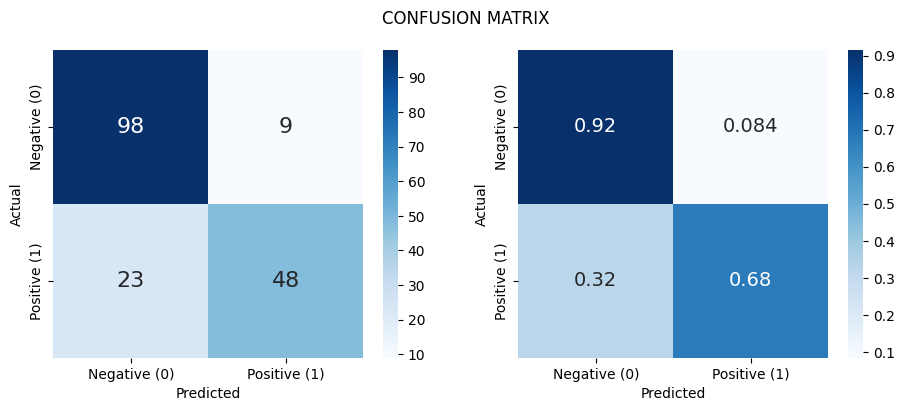

In [45]:
#Plot confusion matrix d·ª±a tr√™n k·∫øt qu·∫£ d·ª± ƒëo√°n c·ªßa model
plt.figure(figsize = (11, 4))
plt.subplot(121)
conf_matrix = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

plt.subplot(122)
conf_matrix_norm = confusion_matrix(y_test, y_test_pred, normalize='true')
df_cm = pd.DataFrame(conf_matrix_norm, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})
plt.suptitle('CONFUSION MATRIX')
plt.show()

In [46]:
# Xem b√°o c√°o ph√¢n lo·∫°i
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.84      0.68      0.75        71

    accuracy                           0.82       178
   macro avg       0.83      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178



#### 5.2.2.C√°ch 2

In [47]:
# Ki·ªÉm tra d·ªØ li·ªáu
df2.head()

Survived  Pclass Sex  Age  SibSp  Parch      Fare  C  Q  S
0         0       3   1   22      1      0  7.250000  0  0  1
1         1       1   0   38      1      0 71.283300  1  0  0
2         1       3   0   26      0      0  7.925000  0  0  1
3         1       1   0   35      1      0 53.100000  0  0  1
4         0       3   1   35      0      0  8.050000  0  0  1

In [48]:
df2.describe()

Survived     Pclass        Age      SibSp      Parch       Fare  \
count 889.000000 889.000000 889.000000 889.000000 889.000000 889.000000   
mean    0.382452   2.311586  29.003375   0.524184   0.382452  32.096681   
std     0.486260   0.834700  13.217813   1.103705   0.806761  49.697504   
min     0.000000   1.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   2.000000  22.000000   0.000000   0.000000   7.895800   
50%     0.000000   3.000000  26.000000   0.000000   0.000000  14.454200   
75%     1.000000   3.000000  36.000000   1.000000   0.000000  31.000000   
max     1.000000   3.000000  80.000000   8.000000   6.000000 512.329200   

               C          Q          S  
count 889.000000 889.000000 889.000000  
mean    0.188976   0.086614   0.724409  
std     0.391710   0.281427   0.447063  
min     0.000000   0.000000   0.000000  
25%     0.000000   0.000000   0.000000  
50%     0.000000   0.000000   1.000000  
75%     0.000000   0.000000   1.000000  
max     1.000000   1.000000   1.000000

In [49]:
# Ki·ªÉm tra d·ªØ li·ªáu c·ªôt Parch (s·ªë l∆∞·ª£ng cha m·∫π ho·∫∑c con c√°i ƒëi c√πng)
df2["Parch"].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [50]:
# Ki·ªÉm tra d·ªØ li·ªáu c·ªôt SibSp (s·ªë l∆∞·ª£ng anh ch·ªã em ho·∫∑c v·ª£ ch·ªìng ƒëi c√πng)
df2["SibSp"].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [51]:
# X√≥a d·ªØ li·ªáu c·ªôt Parch v√† SibSp v√¨ qu√° nhi·ªÅu gi√° tr·ªã 0 ·ªü 2 c·ªôt n√†y d·ªÖ d·∫´n ƒë·∫øn thi√™n l·ªách d·ªØ li·ªáu
df3 = df2.drop(columns = ['Parch','SibSp'])
df3.head() 

Survived  Pclass Sex  Age      Fare  C  Q  S
0         0       3   1   22  7.250000  0  0  1
1         1       1   0   38 71.283300  1  0  0
2         1       3   0   26  7.925000  0  0  1
3         1       1   0   35 53.100000  0  0  1
4         0       3   1   35  8.050000  0  0  1

üëâ Use SMOTE OVERSAMPLING technique

<img src="https://www.researchgate.net/publication/347937180/figure/fig3/AS:973429209563136@1609095017080/Illustration-of-the-SMOTE-oversampling-approach.ppm" width="600">

In [52]:
X = df3.drop(columns='Survived')
y = df3['Survived']

In [53]:
X.shape, y.shape

((889, 7), (889,))

In [54]:
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [55]:
# Install imblearn library
! pip install imblearn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [56]:
from imblearn.over_sampling import SMOTE

# X v√† y l√† c√°c feature v√† label c·ªßa d·ªØ li·ªáu
smote = SMOTE(k_neighbors = 3, random_state=96)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [57]:
X_resampled.shape, y_resampled.shape

((1098, 7), (1098,))

In [58]:
# Check value count of label:
y_resampled.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [59]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, 
                                                    y_resampled, 
                                                    test_size=0.2, 
                                                    random_state=101,
                                                    stratify = y_resampled)

X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

((878, 7), (878,), (220, 7), (220,))

In [60]:
# Load model:
logreg2 = LogisticRegression()
# Train model:
logreg2.fit(X_train1, y_train1)

LogisticRegression()

In [61]:
# Prediction on trainset and testset:
y_test_pred1 = logreg2.predict(X_test1)


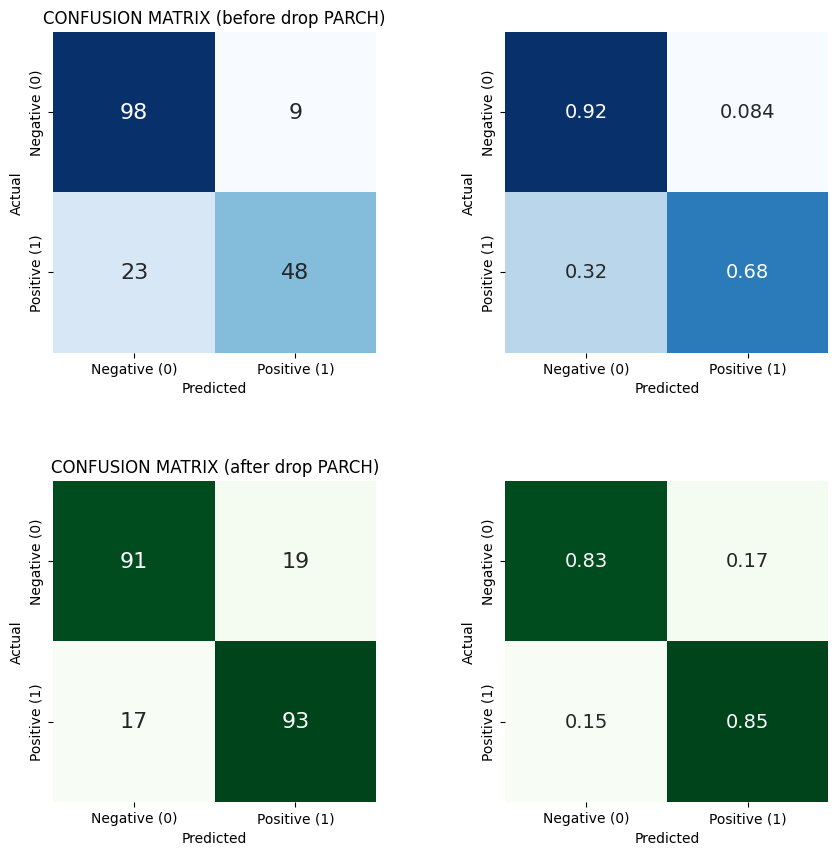

In [62]:
plt.figure(figsize = (10, 10))
# Plot before drop parch col:
plt.subplot(221)
conf_matrix = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, cbar = False)
plt.title('CONFUSION MATRIX (before drop PARCH)')

plt.subplot(222)
conf_matrix_norm = confusion_matrix(y_test, y_test_pred, normalize='true')
df_cm = pd.DataFrame(conf_matrix_norm, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14}, cbar = False)

# Plot after drop parch cols:
plt.subplot(223)
conf_matrix = confusion_matrix(y_test1, y_test_pred1)
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Greens", annot=True,annot_kws={"size": 16}, cbar = False)
plt.title('CONFUSION MATRIX (after drop PARCH)')

plt.subplot(224)
conf_matrix_norm = confusion_matrix(y_test1, y_test_pred1, normalize='true')
df_cm = pd.DataFrame(conf_matrix_norm, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Greens", annot=True,annot_kws={"size": 14}, cbar = False)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [63]:
print('B√°o c√°o ph√¢n lo·∫°i sau khi x√≥a c·ªôt "Parch", "SibSp" v√† th·ª±c hi·ªán OverSampling')
print(classification_report(y_test1,y_test_pred1))


B√°o c√°o ph√¢n lo·∫°i sau khi x√≥a c·ªôt "Parch", "SibSp" v√† th·ª±c hi·ªán OverSampling
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       110
           1       0.83      0.85      0.84       110

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220



In [64]:
print('B√°o c√°o ph√¢n lo·∫°i tr∆∞·ªõc khi x√≥a c·ªôt "Parch", "SibSp" v√† th·ª±c hi·ªán OverSampling')
print(classification_report(y_test,y_test_pred))


B√°o c√°o ph√¢n lo·∫°i tr∆∞·ªõc khi x√≥a c·ªôt "Parch", "SibSp" v√† th·ª±c hi·ªán OverSampling
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.84      0.68      0.75        71

    accuracy                           0.82       178
   macro avg       0.83      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178



### 5.3 D√°n nh√£n ph√¢n lo·∫°i cho t·∫≠p d·ªØ li·ªáu

#### 5.3.1 X·ª≠ l√≠ t·∫≠p d·ªØ li·ªáu

In [65]:
#Import t·∫≠p d·ªØ li·ªáu
df_test = pd.read_csv('Data\\titanic_test.csv')

In [66]:
# Ki·ªÉm tra d·ªØ li·ªáu
df_test

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex       Age  SibSp  Parch              Ticket       Fare Cabin  \
0      male 34.500000      0      0              330911   7.829200   NaN   
1    female 47.000000      1      0              363272   7.000000   NaN   
2      male 62.000000      0      0              240276   9.687500   NaN   
3      male 27.000000      0      0              315154   8.662500   NaN   
4    female 22.000000      1      1             3101298  12.287500   NaN   
..      ...       ...    ...    ...                 ...        ...   ...   
413    male       NaN      0      0           A.5. 3236   8.050000   NaN   
414  female 39.000000      0      0            PC 17758 108.900000  C105   
415    male 38.500000      0      0  SOTON/O.Q. 3101262   7.250000   NaN   
416    male       NaN      0      0              359309   8.050000   NaN   
417    male       NaN      1      1                2668  22.358300   NaN   

    Embarked  
0          Q  
1          S  
2          Q  
3          S  
4          S  
..       ...  
413        S  
414        C  
415        S  
416        S  
417        C  

[418 rows x 11 columns]

In [67]:
# Ki·ªÉm tra d·ªØ li·ªáu null
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [68]:
# L·∫•y tu·ªïi trung v·ªã c·ªßa m·ªói Pclass
med1 = df_test[df_test['Pclass'] == 1]['Age'].median()
med2 = df_test[df_test['Pclass'] == 2]['Age'].median()
med3 = df_test[df_test['Pclass'] == 3]['Age'].median()

# Fill c√°c d·ªØ li·ªáu tu·ªïi b·ªã null
df_test.loc[(df_test['Pclass'] == 1) & (df_test['Age'].isna()), 'Age'] = med1
df_test.loc[(df_test['Pclass'] == 2) & (df_test['Age'].isna()), 'Age'] = med2
df_test.loc[(df_test['Pclass'] == 3) & (df_test['Age'].isna()), 'Age'] = med3


In [69]:
# Chuy·ªÉn tu·ªïi v·ªÅ ki·ªÉu s·ªë nguy√™n
df_test['Age'] = df_test['Age'].astype('int')

In [70]:
# Set gi·ªõi t√≠nh nam l√† 1 gi·ªõi t√≠nh n·ªØ l√† 0
df_test.loc[df_test['Sex'] == 'male', 'Sex'] = 1
df_test.loc[df_test['Sex'] == 'female', 'Sex'] = 0

In [71]:
# Chuy·ªÉn embarked th√†nh d·∫°ng dummies
embark = pd.get_dummies(df_test['Embarked'])
df_test = pd.concat([df_test,embark],axis=1)
df_test

PassengerId  Pclass                                          Name Sex  \
0            892       3                              Kelly, Mr. James   1   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   0   
2            894       2                     Myles, Mr. Thomas Francis   1   
3            895       3                              Wirz, Mr. Albert   1   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   0   
..           ...     ...                                           ...  ..   
413         1305       3                            Spector, Mr. Woolf   1   
414         1306       1                  Oliva y Ocana, Dona. Fermina   0   
415         1307       3                  Saether, Mr. Simon Sivertsen   1   
416         1308       3                           Ware, Mr. Frederick   1   
417         1309       3                      Peter, Master. Michael J   1   

     Age  SibSp  Parch              Ticket       Fare Cabin Embarked  C  Q  S  
0     34      0      0              330911   7.829200   NaN        Q  0  1  0  
1     47      1      0              363272   7.000000   NaN        S  0  0  1  
2     62      0      0              240276   9.687500   NaN        Q  0  1  0  
3     27      0      0              315154   8.662500   NaN        S  0  0  1  
4     22      1      1             3101298  12.287500   NaN        S  0  0  1  
..   ...    ...    ...                 ...        ...   ...      ... .. .. ..  
413   24      0      0           A.5. 3236   8.050000   NaN        S  0  0  1  
414   39      0      0            PC 17758 108.900000  C105        C  1  0  0  
415   38      0      0  SOTON/O.Q. 3101262   7.250000   NaN        S  0  0  1  
416   24      0      0              359309   8.050000   NaN        S  0  0  1  
417   24      1      1                2668  22.358300   NaN        C  1  0  0  

[418 rows x 14 columns]

In [72]:
# X√≥a c·ªôt 'PassengerId','Embarked','Name','Ticket','SibSp','Parch'
df_test.drop(columns=['PassengerId','Embarked','Name','Ticket','SibSp','Parch','Cabin'], inplace=True)

In [73]:
# Ki·ªÉm tra d·ªØ li·ªáu
df_test

Pclass Sex  Age       Fare  C  Q  S
0         3   1   34   7.829200  0  1  0
1         3   0   47   7.000000  0  0  1
2         2   1   62   9.687500  0  1  0
3         3   1   27   8.662500  0  0  1
4         3   0   22  12.287500  0  0  1
..      ...  ..  ...        ... .. .. ..
413       3   1   24   8.050000  0  0  1
414       1   0   39 108.900000  1  0  0
415       3   1   38   7.250000  0  0  1
416       3   1   24   8.050000  0  0  1
417       3   1   24  22.358300  1  0  0

[418 rows x 7 columns]

#### 5.3.2 Ti·∫øn h√†nh d√°n nh√£n d·ªØ li·ªáu cho t·∫≠p d·ªØ li·ªáu

In [74]:
# X√°c ƒë·ªãnh c·ªôt Survived cho t·∫≠p d·ªØ li·ªáu
y_pred = logreg2.predict(df_test)

In [75]:
# Chuy·ªÉn d·ªØ li·ªáu Survived d·ª± ƒëo√°n th√†nh d·∫°ng data frame
survived = pd.DataFrame(y_pred)
survived

0
0    0
1    0
2    0
3    0
4    1
..  ..
413  0
414  1
415  0
416  0
417  0

[418 rows x 1 columns]

In [76]:
# Fill d·ªØ li·ªáu Survived v√†o t·∫≠p d·ªØ li·ªáu
data = pd.read_csv('Data\\titanic_test.csv')
data = pd.concat([data, survived], axis=1)
data.columns = ['PassengerId', 'Pclass', 'Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived']
data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

        Age  SibSp  Parch   Ticket      Fare Cabin Embarked  Survived  
0 34.500000      0      0   330911  7.829200   NaN        Q         0  
1 47.000000      1      0   363272  7.000000   NaN        S         0  
2 62.000000      0      0   240276  9.687500   NaN        Q         0  
3 27.000000      0      0   315154  8.662500   NaN        S         0  
4 22.000000      1      1  3101298 12.287500   NaN        S         1

In [77]:
# Xu·∫•t t·∫≠p d·ªØ li·ªáu sang file CSV
#data.to_csv('Data\\data.csv',index=False)